# The Data Science Pipeline with a Business Problem: Customer Churn

Technologies Used:

![Python](https://img.shields.io/badge/python-v3.7+-blue.svg)
![Jupyter](https://img.shields.io/badge/jupyter-v1.0+-blue.svg)
![OpenAI](https://img.shields.io/badge/openai-v0.0.1-blue.svg)

> Note: To run this notebook, simply download it and then upload it to Google Colab. Then, select a runtime and simply run the code inside of the notebook. You are also more than encouraged to read all the content in this notebook!

![Lab vs Real-World](https://atrium.ai/wp-content/uploads/2021/07/What-stops-customer-churn-Having-a-centralized-data-hub-does-and-heres-why.jpeg)

## **1.1 Overview**

#### ***Customer churn...***
- Customer attrition
- Customer turnover
- Customer defection

***is the loss of clients or customers***

Firms that have subscription or membership business models usually monitor customer churn closely:

- Banks
- Telephone service companies
- Internet service providers
- Pay TV companies
- Insurance firms
- Gyms
- etc.   

----------------

#### ***Customer churn rates*** are often a key business metric (along with cash flow, EBITDA (earnings before interest, tax, depreciation), etc.)
* Cost of retaining an existing customer is far less than acquiring a new one.

-----------------

#### Dedicated departments attempt to ***prevent churn*** and ***win back churned customers***
- Long-term customers can be worth more than newly acquired customers

#### ***BUT: Competitors*** may make special offers to entice customers away
- Customers leave in hope of better service or value for money
- ***Switching cost*** can create hurdles

-----------------
#### Important business activity: ***Customer Retention***
- Can be costly -  *why?*
- To focus retention efforts, must understand ***which customers are at risk of churning***.

## 1.2. **The Business Challenge:** How to Identify customers that are at risk of churning?
- We will use a dataset that is based on real bank data, but was slightly modified for the purpose of this case study to
    - preserve real customers privacies  
    - preserve the bank's privacy  
    - allow for richer analysis
- To prevent customers from churning (i.e., take steps to incentivice them to stay), we need to be able to faithfully identify them.

## 1.3 Let's work our way through ***The Data Science Pipeline***

<img src="https://mapxp.app/MBA742/datasciencepipeline.png" width="600"/>

In [ ]:
# Connect to Google Drive (Change the path as needed to your data & ONLY USABLE IN GOOGLE COLAB!)
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/488/Class03")
!ls

# The data for this notebook is `Bank_Churn_Train.json`, which is in `data` subdirectory.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Bank_Churn_NewCustomers.json  Bank_Churn_Train.json  cleaned_data.csv


In [ ]:
import pandas as pd

# Assuming the file is named 'Bank_Churn_Train.json' and is in the current working directory
# as set up in the preceding code.  If not, adjust the path accordingly.
try:
  df = pd.read_json('Bank_Churn_Train.json')
  print("Data loaded successfully.")
  # You can now work with the DataFrame 'df'
  print(df.head()) # Example: Display the first few rows
except FileNotFoundError:
  print("Error: 'Bank_Churn_Train.json' not found in the current directory.")
except Exception as e:
  print(f"An error occurred: {e}")

Data loaded successfully.
                      ClientID  Surname   Firstname  FICOScore   Subsidiary  \
0  61BOS20150MF65876258487565N    Myles       Fidel        657       Boston   
1  91CHL20170DA95890902611393N  Drenner       Arron        493  Chapel Hill   
2  91CHL20180MC38607441559869N     Muir  Charolette        820  Chapel Hill   
3  61BOS20110SH53586596382094N  Schimpf    Herschel        670       Boston   
4  40ATL20110MK15149165663931P   Montez       Kisha        664      Atlanta   

   Gender  Age   Balance  Products  BankCC  Active  RegDeposits  LifeInsur  \
0    Male   28  64821.12         2       0       0        15330          0   
1    Male   64  90161.70         1       0       1         5599          0   
2  Female   46      0.00         1       0       0        15185          0   
3    Male   37    230.10         2       1       1           13          1   
4  Female   33  76318.32         2       1       1         5278          1   

  PlatStatus  Terminated  
0  

# 2. Data Wrangling and Cleaning with GenAI

                           ClientID Surname Firstname     FICOScore  \
count                         22484   22484     22484  22484.000000   
unique                        22484   22482      5005           NaN   
top     61BOS20150MF65876258487565N   Sutor      Minh           NaN   
freq                              1       2        19           NaN   
mean                            NaN     NaN       NaN    619.571962   
std                             NaN     NaN       NaN    100.746553   
min                             NaN     NaN       NaN    350.000000   
25%                             NaN     NaN       NaN    549.000000   
50%                             NaN     NaN       NaN    621.000000   
75%                             NaN     NaN       NaN    691.000000   
max                             NaN     NaN       NaN    850.000000   

       Subsidiary Gender           Age       Balance      Products   BankCC  \
count       22484  22484  22484.000000  2.248400e+04  22484.000000  

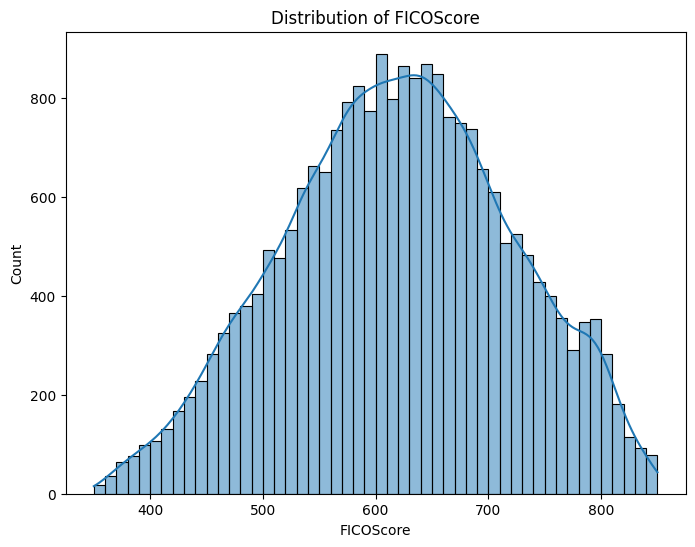

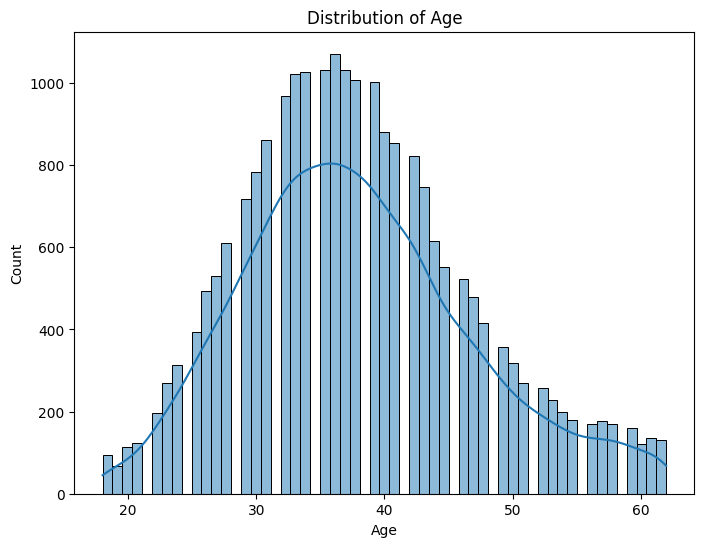

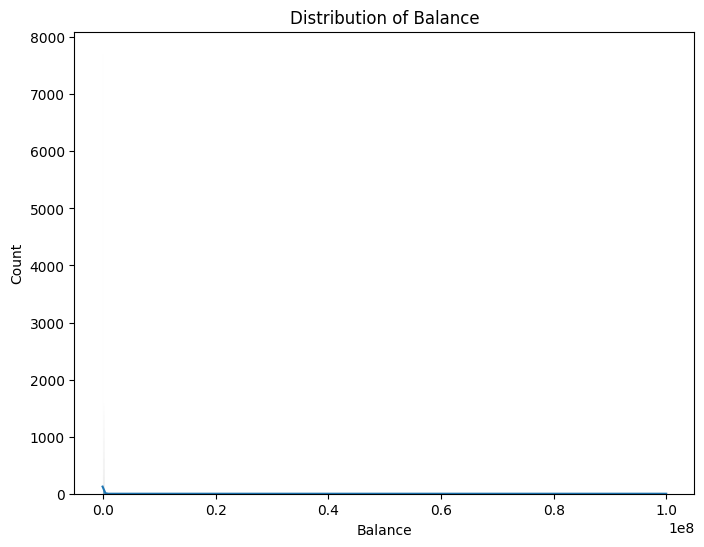

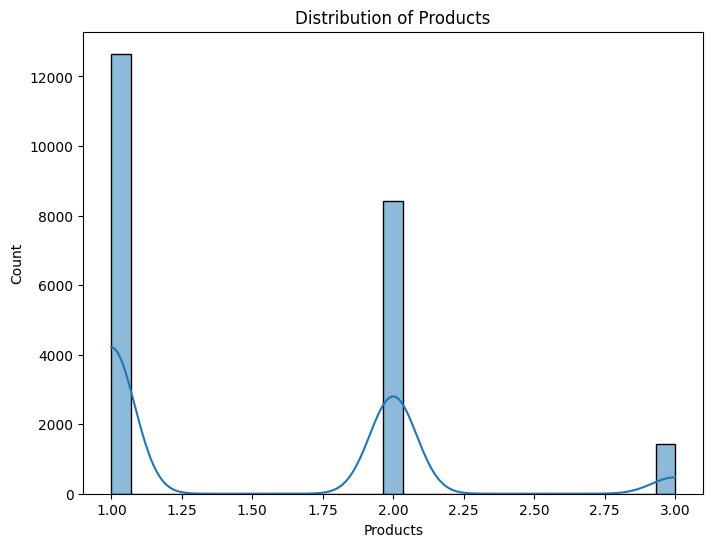

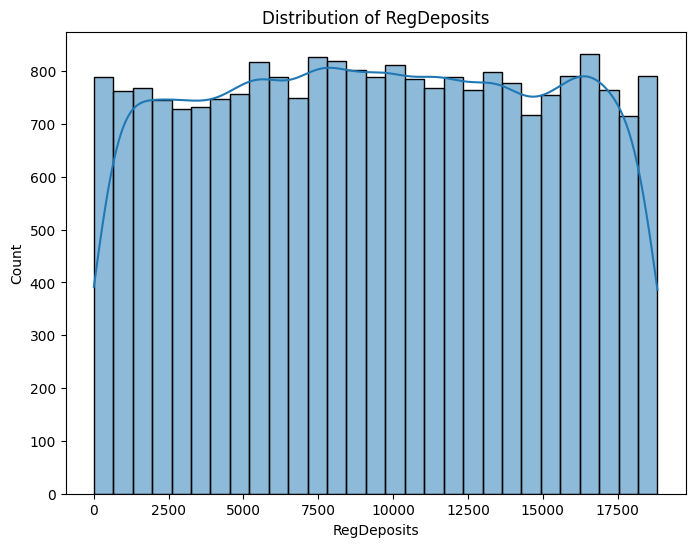

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded as a pandas DataFrame (as in the preceding code)

# Describe the data
print(df.describe(include='all'))
print(df.info())

# Now let's make plots
# Numerical features
numerical_features = df.select_dtypes(include=['number'])
for column in numerical_features.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


# Categorical features
categorical_features = df.select_dtypes(include=['object'])
for column in categorical_features.columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {column}')
    plt.show()

# Example for 'Attrition_Flag' (binary) - more specific visualization
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Attrition Flag Distribution')
plt.show()


#Correlation Matrix Heatmap for Numerical Features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## 2.1 Data Wrangling
For now, we may not need to do anything here:
- We have a single data file (flat file)
- We have a good set of variables
- *We may come back later to some feature engineering (= create new features/variables/columns from existing ones)*

## 2.2 Data Cleaning

- Ensure consistent data types
- Discover implausible or invalid values (e.g., in the "Active" column, amongst others)
  -  Consider recoding variables and enforcing enforcing boundaries

- Impute missing values
  - What about implausible/invalid values?
- Remove outliers
- Other?

**Steps with ChatGPT (or Copilot or similar)**
1. Upload the dataset to ChatGPT
2. Ask it how these data might be cleaned.
> *I want to create a predictive model. How would I clean these data?*
3. Check if the **categorical variables are consistent**:   
> *Are these categorical columns consistent: 'Gender', 'Subsidiary', 'BankCC', 'Active', 'LifeInsur', 'PlatStatus', 'Terminated' ?*
>  
> *Make the categorical variables consistent. Do not set to missing. Replace inconsistent with appropriate values*
4. Make sure that the **categorical variables are of type "categorical"**.
> *Make the categorical variables of type categorical*
5. Focus on the numerical variables that are interesting to us: ***Are the numerical values valid?***
> *Ask yourself:*
> - *What is a valid FICO Score? (FICOScore)*
> - *What is a valid Age? (Age)*
> - *What is a valid Account Balance? Negative balances are possible, right? (Balance)*
> - *What is a plausible number of products? (Products)*
> - *What is a plausible Regular Deposits? (RegDeposits)*
>
6. Fix **implausible values** and **remove outliers**:
> *Investigate and fix these numerical variables so that they fall in the right range by (1) imputing invalid or missing values, and (2) removing outliers*
7. Now, **transfer the code to CoLab** and run it here
> *Give me the entire cleaning code from the previous steps so that I can run it in Google CoLab. I already loaded the data into dataframe df*
8. If you  get **errors or undesirable outcomes in Colab**, go back to ChatGPT (Copy-Paste code and the error messages) and ask ChatGPT to fix it, then back to Step 7.


In [ ]:
import pandas as pd

# Assuming the data is already loaded into a DataFrame named df

# Step 1: Clean Categorical Variables
def clean_categorical(data, column, valid_values, default_value):
    data[column] = data[column].apply(lambda x: x if x in valid_values else default_value)
    return data

# Define valid values for categorical columns
valid_values_dict = {
    'Gender': ['Male', 'Female'],
    'Subsidiary': ['Boston', 'Chapel Hill', 'Atlanta'],
    'BankCC': [0, 1],
    'Active': [0, 1],
    'LifeInsur': [0, 1],
    'PlatStatus': [0, 1],
    'Terminated': [0, 1]
}

# Clean each categorical column
for col, valid_values in valid_values_dict.items():
    df = clean_categorical(df, col, valid_values, valid_values[0])

# Convert categorical columns to pandas Categorical dtype
categorical_columns = list(valid_values_dict.keys())
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Step 2: Clean Numerical Variables
# Define valid ranges for numerical variables
valid_ranges = {
    'FICOScore': (300, 850),  # FICO scores range
    'Age': (18, 120),         # Valid age range
    'Balance': None,          # Allow negatives; no fixed range
    'Products': (1, 10),      # Plausible range of products
    'RegDeposits': (0, None)  # Regular deposits should be >= 0
}

# Function to fix out-of-range values
def fix_out_of_range(data, column, valid_range, default_value=None):
    if valid_range:
        lower, upper = valid_range
        if lower is not None:
            data.loc[data[column] < lower, column] = default_value if default_value is not None else lower
        if upper is not None:
            data.loc[data[column] > upper, column] = default_value if default_value is not None else upper
    return data

# Function to remove outliers using the IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Apply fixes to numerical columns
for column, valid_range in valid_ranges.items():
    if column in df.columns:
        default_value = valid_range[0] if valid_range else None
        df = fix_out_of_range(df, column, valid_range, default_value)
        if valid_range:  # Remove outliers if a range is defined
            df = remove_outliers(df, column)

# Display cleaned data
print("Data cleaning complete. Cleaned DataFrame:")
print(df.head())

# Save the cleaned data to a CSV file (optional)
df.to_csv('cleaned_data.csv', index=False)


Data cleaning complete. Cleaned DataFrame:
                      ClientID      Surname   Firstname  FICOScore  \
0  61BOS20150MF65876258487565N        Myles       Fidel        657   
2  91CHL20180MC38607441559869N         Muir  Charolette        820   
3  61BOS20110SH53586596382094N      Schimpf    Herschel        670   
4  40ATL20110MK15149165663931P       Montez       Kisha        664   
5  61BOS20110VN70126282954472N  Vannostrand      Nestor        609   

    Subsidiary  Gender  Age   Balance  Products BankCC Active  RegDeposits  \
0       Boston    Male   28  64821.12         2      0      0        15330   
2  Chapel Hill  Female   46      0.00         1      0      0        15185   
3       Boston    Male   37    230.10         2      1      1           13   
4      Atlanta  Female   33  76318.32         2      1      1         5278   
5       Boston    Male   60   1022.58         1      0      1        15881   

  LifeInsur PlatStatus Terminated  
0         0          0         

# **Main Message:**
### Data cleaning ensures a **consistent**, **accurate**, and **ready-to-use dataset** for predictive modeling.

---

### **Key Reasons for Data Cleaning**
1. **Inconsistent Categorical Data:**
   - Variables like `Gender`, `Subsidiary`, and binary flags (`BankCC`, `Active`, etc.) were standardized to ensure valid categories.

2. **Out-of-Range Values:**
   - Numerical variables such as `FICOScore` and `Age` were corrected to fall within valid, plausible ranges (e.g., `FICOScore`: 300–850, `Age`: 18–120).

3. **Handling Outliers:**
   - Outliers in variables like `Balance` and `RegDeposits` were identified using the IQR method and either removed or corrected to improve data quality.

4. **Addressing Missing and Invalid Values:**
   - Missing or invalid entries in categorical and numerical variables were imputed with appropriate default or computed values to maintain dataset integrity.

5. **Improving Data Consistency:**
   - Converting variables to proper data types (e.g., converting `Gender` and `Subsidiary` to categorical types) ensures proper handling during analysis.

6. **Preparing Data for Modeling:**
   - By cleaning and transforming the dataset, we minimize the risk of biases or errors, improving model performance and interpretability.

---

### **Importance of Clean Data**
- **Improved Model Accuracy**: Clean data reduces noise and ensures valid input for the model.
- **Efficient Processing**: Consistent data types and valid ranges facilitate faster computations and better algorithm compatibility.
- **Reliable Insights**: Prevents misleading results caused by erroneous or inconsistent data.

# 3. Exploratory Data Analysis with GenAI (Gemini vs. ChatGPT 4o)

Let's do some EDA with Gemini (ColabAI) and ChatGPT 4o(mini) or another AI of your choice such as Claude 3.5 Sonnet from Anthropic.

### **What is EDA?**

**Exploratory Data Analysis (EDA)** is the process of examining and analyzing data sets to summarize their main characteristics, often using visual methods. It is a critical step in the data science workflow and serves as the foundation for building predictive models, identifying patterns, and discovering insights.

Key techniques include:
- **Descriptive statistics**: Summarizing the data using measures like mean, median, standard deviation, and variance.
- **Visualization**: Using charts like histograms, scatter plots, box plots, and heatmaps to reveal trends, correlations, and outliers.
- **Data cleaning insights**: Identifying missing values, inconsistent data, and potential outliers.
- **Feature engineering**: Discovering transformations or new features that may enhance the analysis or modeling.

---

### **Value of EDA**

EDA adds value at various stages of the data analysis and modeling pipeline:

1. **Understanding the Data**
   - Provides insights into the structure, relationships, and distributions of the data.
   - Helps assess the quality of the data and readiness for modeling.

2. **Detecting Anomalies**
   - Identifies missing data, outliers, and inconsistencies that may impact analysis or predictions.
   - Facilitates decisions about data cleaning and transformation.

3. **Guiding Feature Selection**
   - Helps identify which features are most important or impactful for your target variable.
   - Highlights redundant or irrelevant features that can be removed to simplify the model.

4. **Uncovering Patterns and Trends**
   - Helps identify relationships between variables, such as correlations, trends over time, or clustering.
   - May reveal underlying structures that are not immediately obvious.

5. **Informing Modeling Decisions**
   - Provides evidence for selecting appropriate modeling techniques (e.g., linear models vs. tree-based models).
   - Helps anticipate issues like multicollinearity or skewed distributions.

6. **Enhancing Communication**
   - Summarized findings and visuals from EDA can communicate key insights to stakeholders in a clear and compelling way.
   - Enables collaboration by grounding discussions in data-backed evidence.

7. **Avoiding Missteps**
   - Prevents costly errors by ensuring the data is well-understood before diving into complex models or analyses.

---

### **How to Conduct EDA?**

Typical steps in EDA include:
1. **Data Overview**
   - Inspect data types, dimensions, and missing values.
   - Check for duplicated or irrelevant rows/columns.
2. **Univariate Analysis**
   - Analyze each variable individually to understand its distribution and range.
3. **Bivariate Analysis**
   - Explore relationships between pairs of variables using scatter plots, correlation matrices, or chi-square tests.
4. **Multivariate Analysis**
   - Examine complex interactions among multiple variables using advanced techniques like PCA, clustering, or heatmaps.
5. **Data Cleaning**
   - Address missing data, remove outliers, and fix inconsistencies based on EDA findings.

---

## 3.1 Let's ask Gemini to do some EDA on your wrangled and cleaned data.

Here are some examples you might ask for:
- Distributions of numerical data
- Boxplots and Outliers
- Categorical by Churn Status

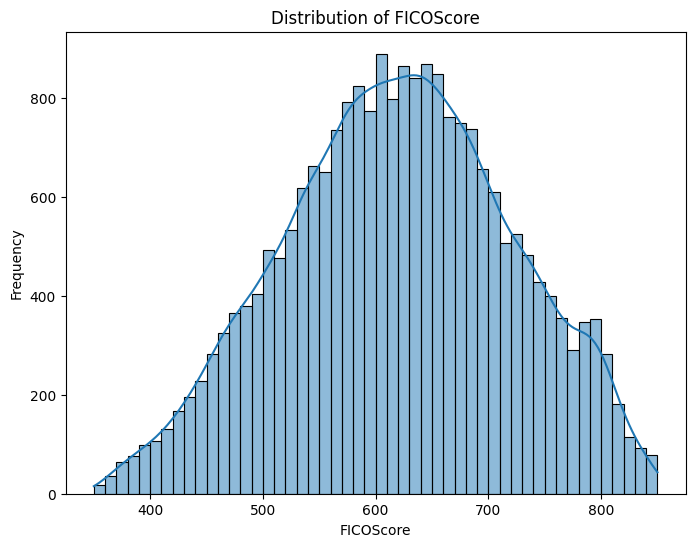

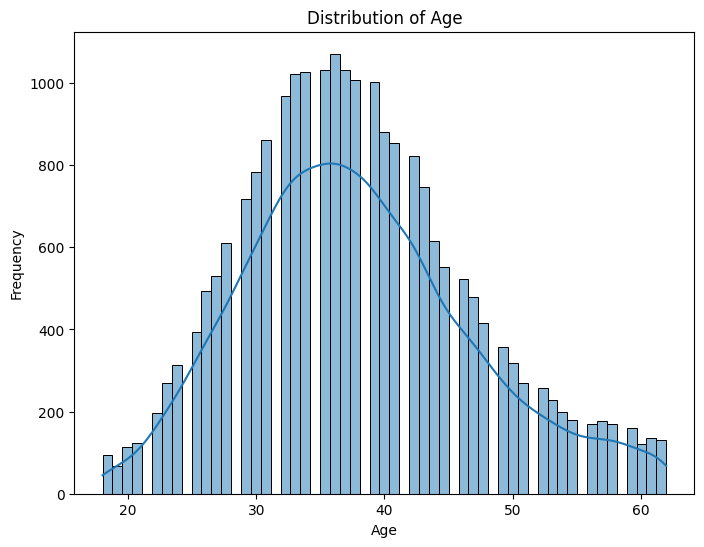

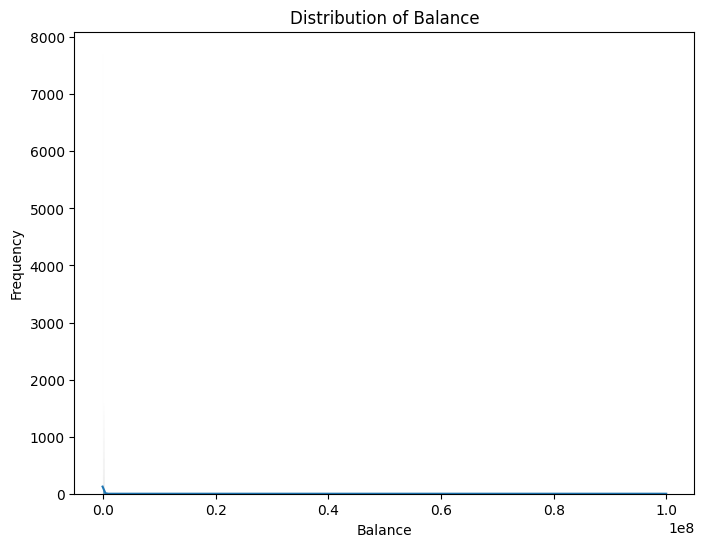

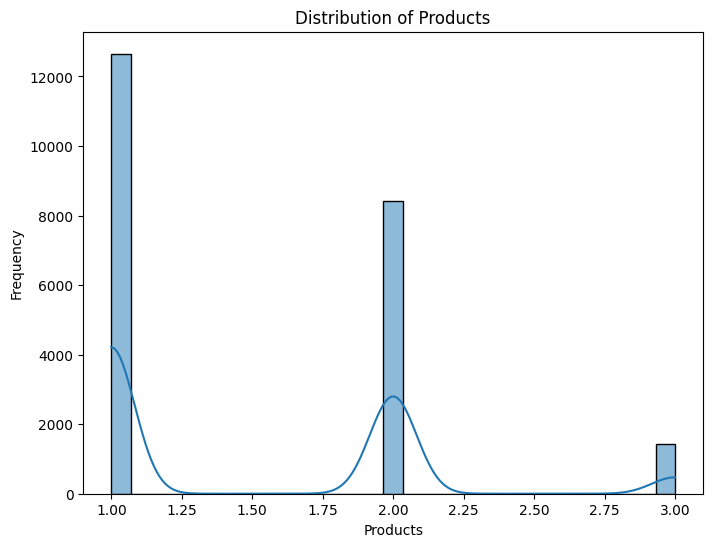

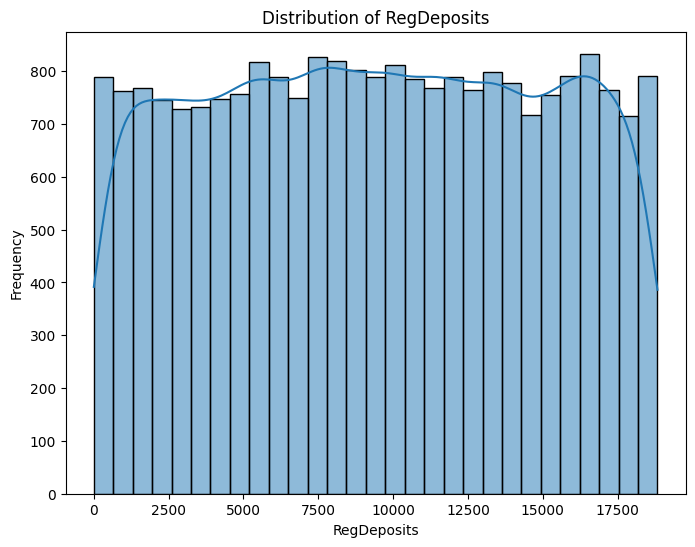

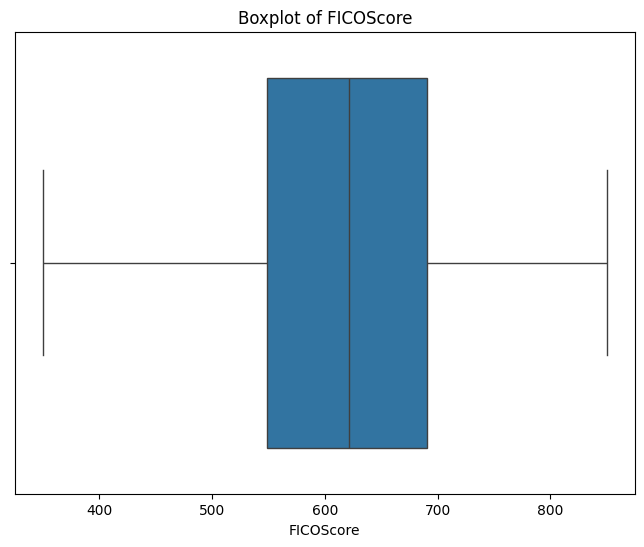

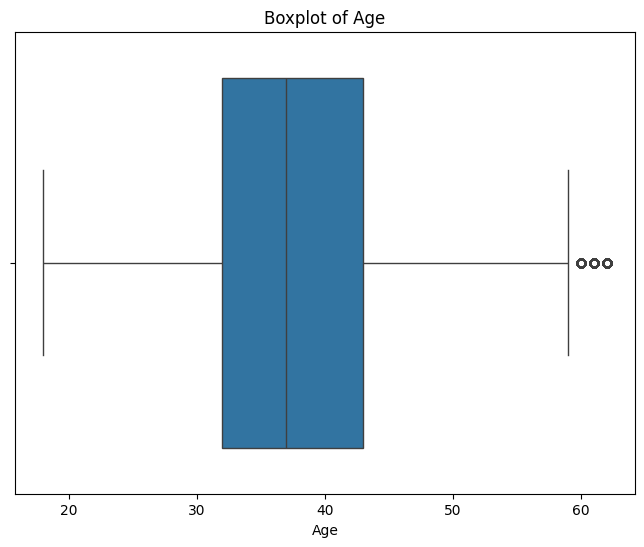

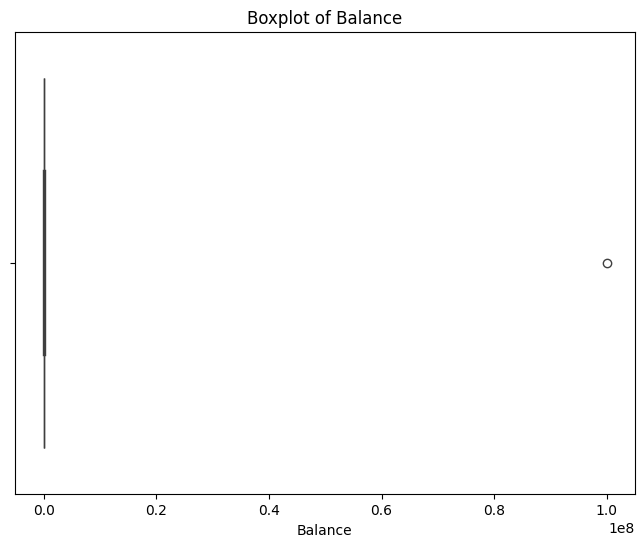

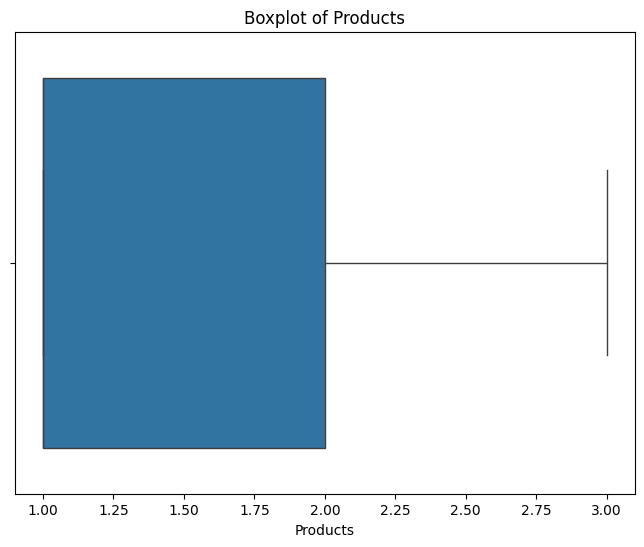

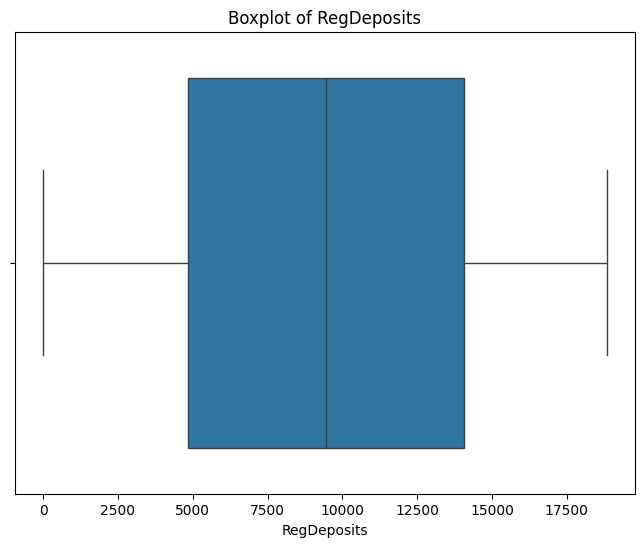

Error: 'Attrition_Flag' column not found in the DataFrame.


In [ ]:
# prompt: Generate correct code that provides boxplots and outliers, as well as Distributions of numerical data

# Assuming 'df' is the cleaned DataFrame from the previous code cell

# Distributions of numerical data
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplots and Outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Categorical by Churn Status (assuming 'Attrition_Flag' is the churn indicator)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
# Check if 'Attrition_Flag' is in the DataFrame columns
if 'Attrition_Flag' in df.columns:
    for col in categorical_cols:
        if col != 'Attrition_Flag':  # Exclude the target variable itself
            plt.figure(figsize=(10, 6))
            sns.countplot(x=col, hue='Attrition_Flag', data=df)
            plt.title(f'{col} by Churn Status')
            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
            plt.show()
else:
    print("Error: 'Attrition_Flag' column not found in the DataFrame.")

## 3.2 Let's ask ChatGPT to help you with some EDA on your wrangled and cleaned data.

Dataset Dimensions: (22484, 15)
Summary Statistics:
           FICOScore           Age       Balance      Products   RegDeposits
count  22484.000000  22484.000000  2.248400e+04  22484.000000  22484.000000
mean     619.571962     37.877291  7.283147e+04      1.500178   9439.271838
std      100.746553      8.999663  6.688501e+05      0.613239   5406.671399
min      350.000000     18.000000 -1.283727e+05      1.000000      0.000000
25%      549.000000     32.000000  4.447325e+02      1.000000   4842.500000
50%      621.000000     37.000000  8.291377e+04      1.000000   9469.500000
75%      691.000000     43.000000  1.124858e+05      2.000000  14071.000000
max      850.000000     62.000000  1.000000e+08      3.000000  18833.000000
Null Values:
 ClientID       0
Surname        0
Firstname      0
FICOScore      0
Subsidiary     0
Gender         0
Age            0
Balance        0
Products       0
BankCC         0
Active         0
RegDeposits    0
LifeInsur      0
PlatStatus     0
Terminated 

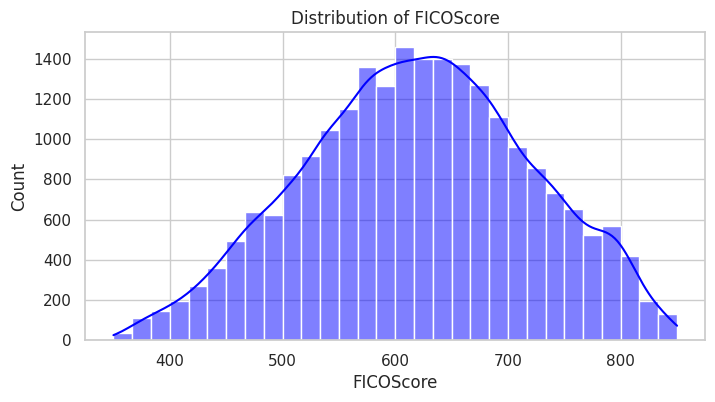

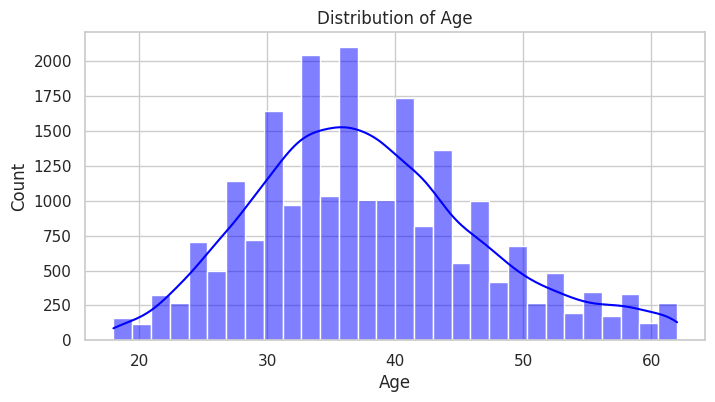

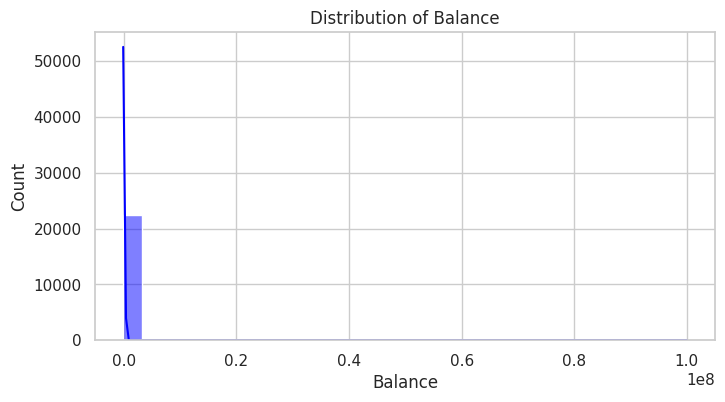

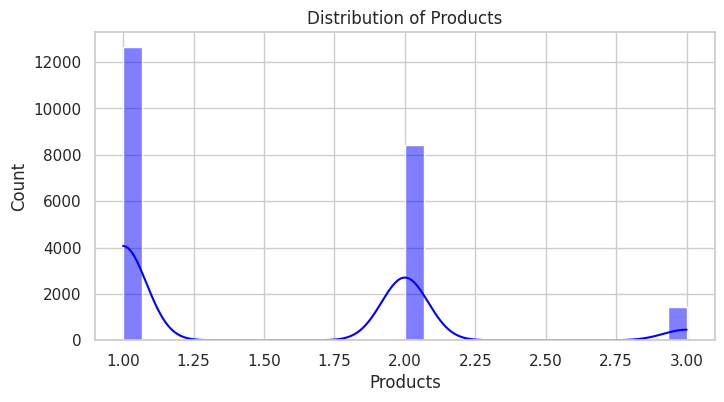

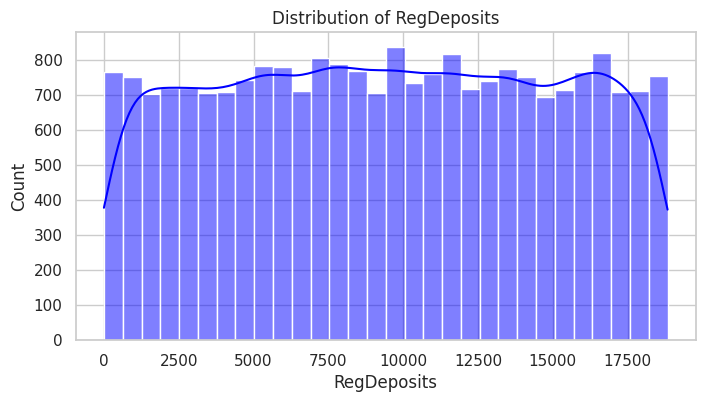

<ipython-input-9-d76430960d19>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


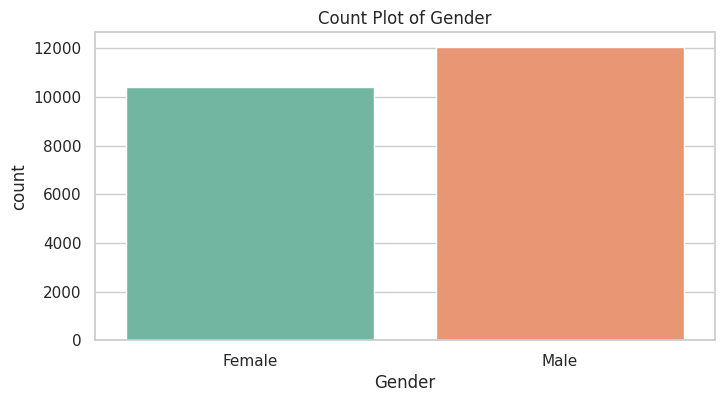

<ipython-input-9-d76430960d19>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


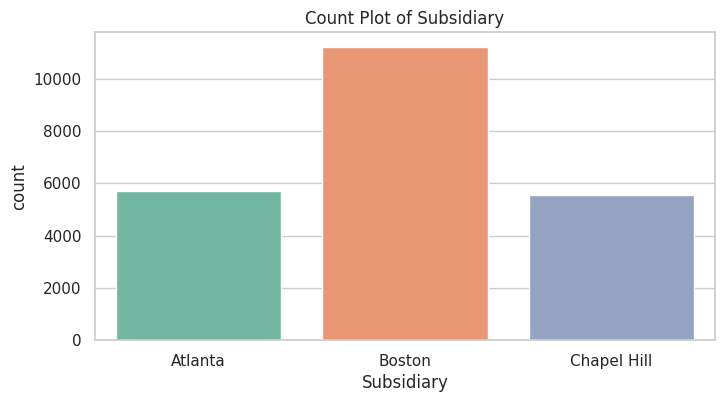

<ipython-input-9-d76430960d19>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


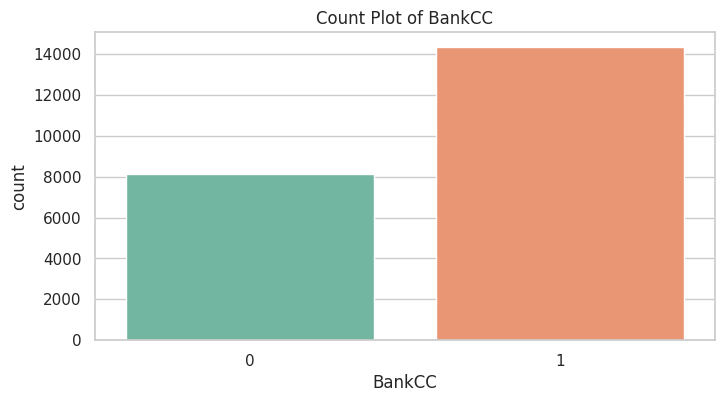

<ipython-input-9-d76430960d19>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


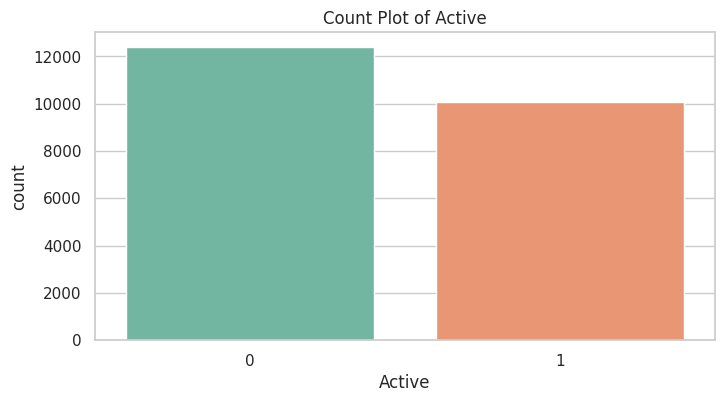

<ipython-input-9-d76430960d19>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


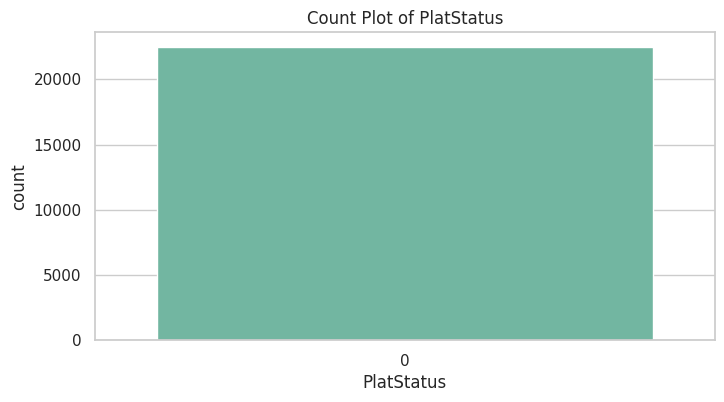

<ipython-input-9-d76430960d19>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


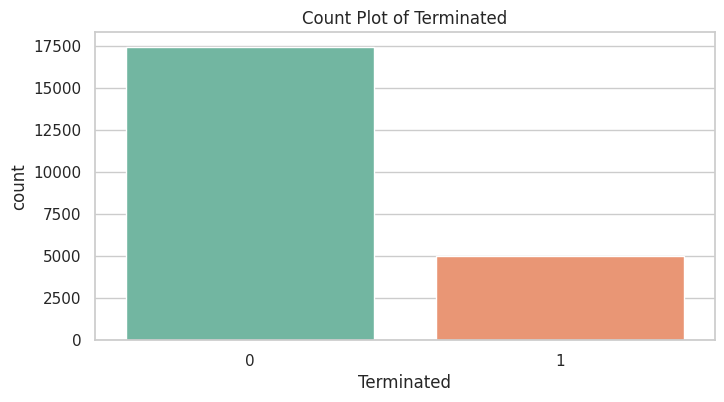

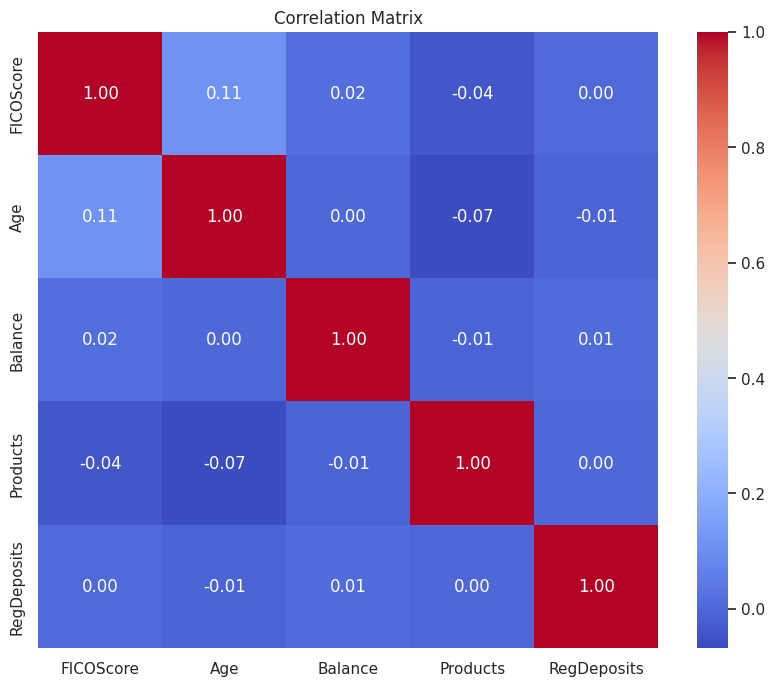

Average Balance by Subsidiary and Gender:
Gender              Female           Male
Subsidiary                               
Atlanta      105256.545912  106773.937564
Boston        54584.412495   56439.361730
Chapel Hill   54572.593872   89428.916185


<ipython-input-9-d76430960d19>:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  print(df.pivot_table(values='Balance', index='Subsidiary', columns='Gender', aggfunc='mean'))


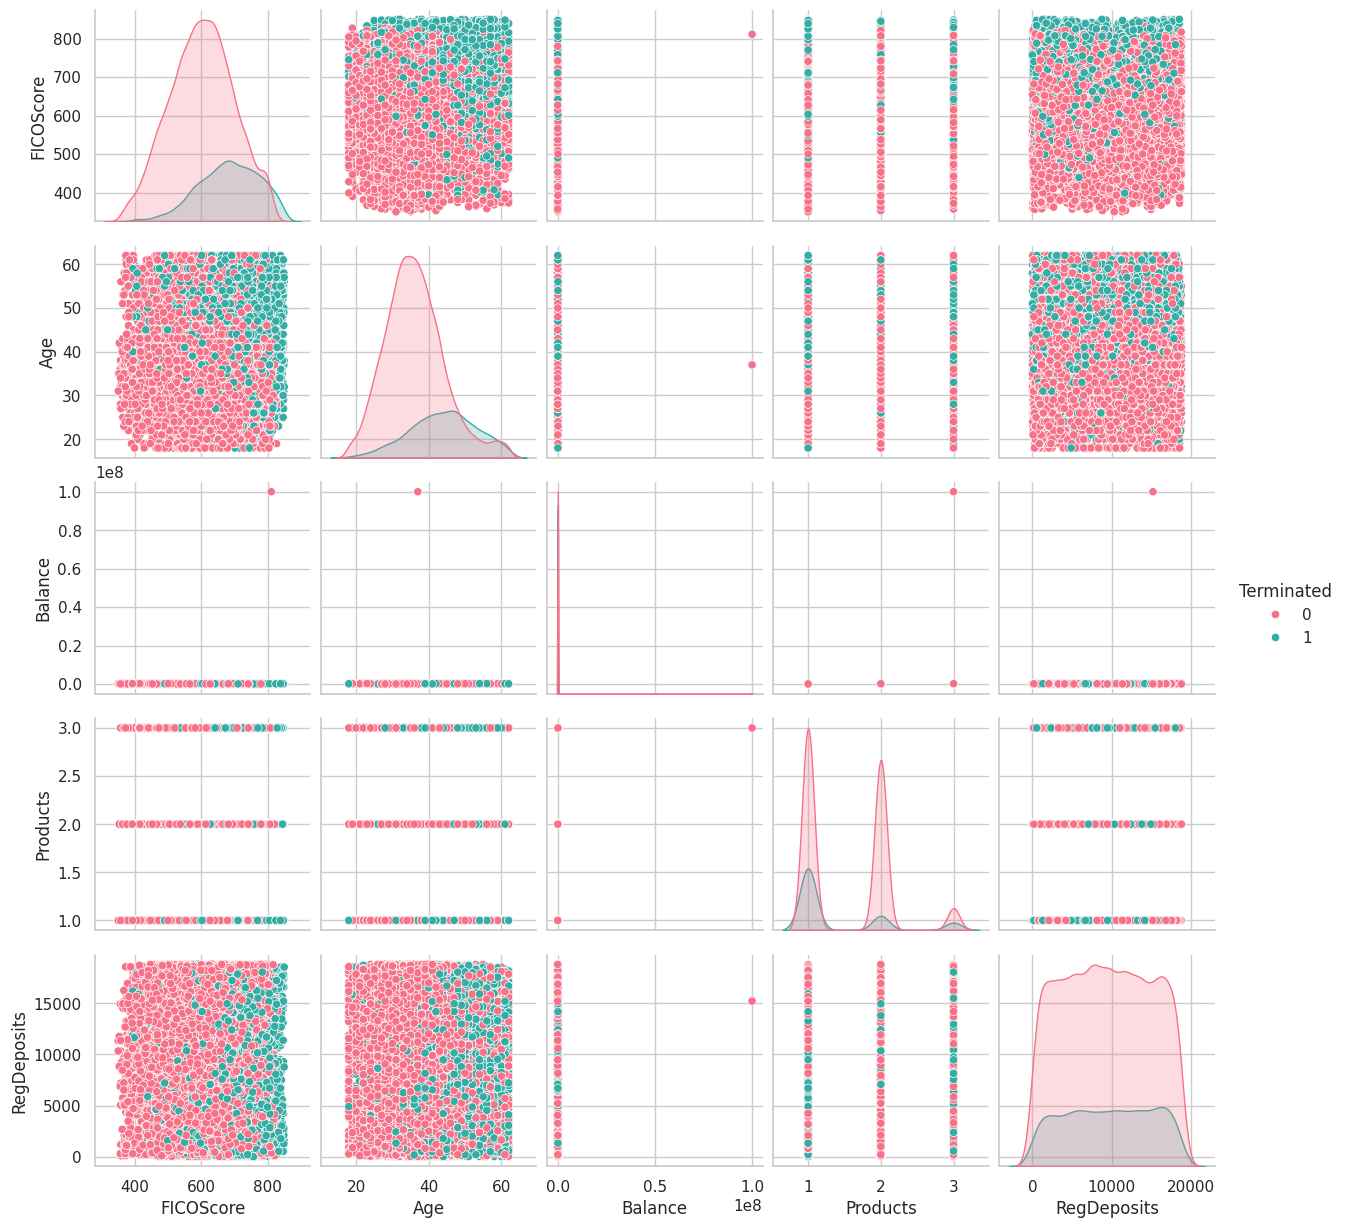

<ipython-input-9-d76430960d19>:47: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  termination_rate = df.groupby(col)['Terminated'].mean()


TypeError: category dtype does not support aggregation 'mean'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure seaborn has the default style
sns.set(style="whitegrid")

# Step 1: Basic Data Overview
print("Dataset Dimensions:", df.shape)
print("Summary Statistics:\n", df.describe())
print("Null Values:\n", df.isnull().sum())

# Step 2: Numerical Feature Distributions
numerical_cols = ['FICOScore', 'Age', 'Balance', 'Products', 'RegDeposits']
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Step 3: Categorical Features Analysis
categorical_cols = ['Gender', 'Subsidiary', 'BankCC', 'Active', 'PlatStatus', 'Terminated']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Count Plot of {col}")
    plt.show()

# Step 4: Relationships Between Variables
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Pivot Table Example
print("Average Balance by Subsidiary and Gender:")
print(df.pivot_table(values='Balance', index='Subsidiary', columns='Gender', aggfunc='mean'))

# Pair Plots
sns.pairplot(df[numerical_cols + ['Terminated']], hue='Terminated', palette="husl")
plt.show()

# Step 5: Target Variable Analysis
# Termination Rates by Categorical Variables
for col in ['Gender', 'Subsidiary', 'BankCC']:
    termination_rate = df.groupby(col)['Terminated'].mean()
    plt.figure(figsize=(8, 4))
    termination_rate.plot(kind='bar', color='orange', alpha=0.7)
    plt.title(f"Termination Rate by {col}")
    plt.ylabel("Termination Rate")
    plt.show()

# 4. Load, Wrangle, and Clean Data
- Load the data (*Bank_Churn_Train.json*) and wrangle and clean it (we call this **preprocessing**)

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import os

In [ ]:
drive.mount('/content/drive')
# Change this as needed
os.chdir("/content/drive/My Drive/488/Class03")
!ls -l

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 8437
-rw------- 1 root root  190668 Jan 15 20:35 Bank_Churn_NewCustomers.json
-rw------- 1 root root 6427792 Jan 15 20:36 Bank_Churn_Train.json
-rw------- 1 root root 2019966 Jan 15 21:09 cleaned_data.csv


In [ ]:
# prompt: load this file Bank_Churn_Train.json

df = pd.read_json('Bank_Churn_Train.json')
df

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,Terminated
0,61BOS20150MF65876258487565N,Myles,Fidel,657,Boston,Male,28,64821.12,2,0,0,15330,0,0,0
1,91CHL20170DA95890902611393N,Drenner,Arron,493,Chapel Hill,Male,64,90161.70,1,0,1,5599,0,0,0
2,91CHL20180MC38607441559869N,Muir,Charolette,820,Chapel Hill,Female,46,0.00,1,0,0,15185,0,0,1
3,61BOS20110SH53586596382094N,Schimpf,Herschel,670,Boston,Male,37,230.10,2,1,1,13,1,0,0
4,40ATL20110MK15149165663931P,Montez,Kisha,664,Atlanta,Female,33,76318.32,2,1,1,5278,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,40ATL20160TJ2301576765838N,Tondreau,Jeffrey,678,Atlanta,Male,47,88960.56,2,1,0,14963,0,0,1
23996,61BOS20150HB1119146617276N,Hevrin,Brad,627,Boston,Male,28,862.68,1,0,1,15206,0,0,0
23997,40ATL20140RP44230979729440N,Russer,Penney,682,Atlanta,Female,48,76374.48,2,0,0,189,1,0,0
23998,40ATL20140PB19106060056904N,Polizio,Brigette,839,Atlanta,Female,39,112642.93,1,1,1,6696,0,0,1


In [ ]:
# prompt: describe each column of the data. Use display

display(df.describe(include='all'))
display(df.info())

,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,Terminated
count,24000,24000,24000,24000.000000,24000,24000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000,24000.000000
unique,24000,23998,5057,NaN,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,61BOS20150MF65876258487565N,Sutor,Minh,NaN,Boston,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
freq,1,2,20,NaN,11913,12797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19356,NaN
mean,NaN,NaN,NaN,624.726250,NaN,NaN,39.214583,7.266221e+04,1.530042,0.637333,0.456208,9.712217e+03,0.280250,NaN,0.243292
std,NaN,NaN,NaN,105.347391,NaN,NaN,10.759454,6.475290e+05,0.696085,0.480866,0.498173,4.400865e+04,0.449131,NaN,0.429079
min,NaN,NaN,NaN,0.000000,NaN,NaN,3.000000,-1.283727e+05,0.000000,0.000000,0.000000,-2.340000e+03,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,552.000000,NaN,NaN,32.000000,4.508350e+02,1.000000,0.000000,0.000000,4.813000e+03,0.000000,NaN,0.000000
50%,NaN,NaN,NaN,624.000000,NaN,NaN,38.000000,8.311797e+04,1.000000,1.000000,0.000000,9.460500e+03,0.000000,NaN,0.000000
75%,NaN,NaN,NaN,696.000000,NaN,NaN,45.000000,1.124337e+05,2.000000,1.000000,1.000000,1.407400e+04,1.000000,NaN,0.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ClientID     24000 non-null  object 
 1   Surname      24000 non-null  object 
 2   Firstname    24000 non-null  object 
 3   FICOScore    24000 non-null  int64  
 4   Subsidiary   24000 non-null  object 
 5   Gender       24000 non-null  object 
 6   Age          24000 non-null  int64  
 7   Balance      24000 non-null  float64
 8   Products     24000 non-null  int64  
 9   BankCC       24000 non-null  int64  
 10  Active       24000 non-null  int64  
 11  RegDeposits  24000 non-null  int64  
 12  LifeInsur    24000 non-null  int64  
 13  PlatStatus   24000 non-null  object 
 14  Terminated   24000 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 2.7+ MB


None

In [ ]:
### Cleaning the Data

# Categorical Columns
categorical_columns = ['Gender', 'Subsidiary', 'BankCC', 'Active', 'LifeInsur', 'PlatStatus', 'Terminated']

# Fixing Categorical Columns
# Fixing typo in 'Gender'
df['Gender'] = df['Gender'].replace('Feale', 'Female')

# Fixing 'BankCC' - assuming binary variable (replace 2 with 1)
df['BankCC'] = df['BankCC'].replace(2, 1)

# Fixing 'Active' - assuming binary variable (replace 2 with 1)
df['Active'] = df['Active'].replace(2, 1)

# Fixing 'PlatStatus' - replacing 'yes' with '1'
df['PlatStatus'] = df['PlatStatus'].replace('yes', '1')

# Converting categorical columns to type 'category'
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Numerical Variables
valid_ranges = {
    'FICOScore': (300, 850),
    'Age': (18, 100),
    'Balance': (-np.inf, np.inf),  # Allowing negative balances
    'Products': (1, 5),
    'RegDeposits': (0, 100000)
}

def fix_numerical_variable(data, column, valid_range):
    lower, upper = valid_range
    # Replace invalid or missing values with the median of valid values
    median = data[column][(data[column] >= lower) & (data[column] <= upper)].median()
    # Cast the median to the same type as the column
    if pd.api.types.is_integer_dtype(data[column]):
        median = int(median)
    elif pd.api.types.is_float_dtype(data[column]):
        median = float(median)

    # Replace invalid or missing values
    data.loc[(data[column] < lower) | (data[column] > upper) | (data[column].isnull()), column] = median

    # Calculate bounds for outlier removal
    mean = data[column].mean()
    std_dev = data[column].std()
    upper_limit = mean + 3 * std_dev
    lower_limit = mean - 3 * std_dev

    # Remove outliers
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

# Cleaning numerical variables
for col, range_ in valid_ranges.items():
    df = fix_numerical_variable(df, col, range_)

# After Cleaning: Verify Ranges
cleaned_ranges = {col: (df[col].min(), df[col].max()) for col in valid_ranges.keys()}

print("Cleaned Ranges:", cleaned_ranges)

Cleaned Ranges: {'FICOScore': (350, 850), 'Age': (18, 71), 'Balance': (-128372.66, 260951.61), 'Products': (1, 3), 'RegDeposits': (0, 18833)}


# 5. Build a Predictive Model: Supervised Learning
- It's time to train a machine learning model to predict which customers are likely to churn.
  - We have variables (columns) describing customers: our independent variables or Xs.
  - We have an outcome ("terminated") for each custiomer: our dependent variabel or Y.

> Having Xs and a Y, we will use ***supervised learning*** for this problem.
> Because our Y is binary (yes or no), we have a ***classification*** problem.

<img src="https://mapxp.app/MBA742/MachineLearning.jpg" width="600"/>

## 5.1 Instantiate and Train a Classifier

Let's create a classification model that can predict whether a customer will churn or not in our *Bank_Churn_Train.json* data. Ask ChatGPT and/or Gemini for help! Here are some steps that you need to ask for (make sure that they are taken):

1. Separate independent (Xs) from dependent (Y) variables
2. Split the dataset into a *train* and *test* set
  - You train the model on *train* and then evaluate its performance on *test* (which it ahs not seen during training) to check how good it is.
3. Load and instantiate (i.e., set-up) a classification model. This includes selecting the model type and setting some parameters that control how it is trained.
4. Train the model (run the training)

> **Hint**: There are various ways of doing this. You can upload the data to ChatGPT, work there, and then copy the working code into CoLab to create a notebook you can save and share. Or, you can work in CoLab the whole time (use Gemini and copy code snippets from/to ChatGPT improve it, fix it, diagnose errors, etc.)


In [ ]:
from sklearn.model_selection import train_test_split

# Separating independent (X) and dependent (Y) variables
# Assuming 'Terminated' is the target variable for predicting churn
X = df.drop(columns=['Terminated'])  # Independent variables
Y = df['Terminated']                 # Dependent variable

# Splitting the dataset into training and testing sets
# 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Displaying the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

# Optional: Verify class distribution in training and test sets
print("Training set class distribution:\n", Y_train.value_counts(normalize=True))
print("Testing set class distribution:\n", Y_test.value_counts(normalize=True))

X_train shape: (18773, 14)
X_test shape: (4694, 14)
Y_train shape: (18773,)
Y_test shape: (4694,)
Training set class distribution:
 Terminated
0    0.763011
1    0.236989
Name: proportion, dtype: float64
Testing set class distribution:
 Terminated
0    0.762889
1    0.237111
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Separate independent (X) and dependent (Y) variables
X = df.drop(columns=['Terminated', 'ClientID', 'Surname', 'Firstname'])  # Remove non-relevant or identifier columns
Y = df['Terminated']

# Encode categorical variables
categorical_columns = X.select_dtypes(include=['category']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Train a RandomForest Classifier (as an example)
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3581
           1       0.86      0.72      0.78      1113

    accuracy                           0.91      4694
   macro avg       0.89      0.84      0.86      4694
weighted avg       0.90      0.91      0.90      4694


Confusion Matrix:
[[3454  127]
 [ 313  800]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
clf = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=None,        # Maximum depth of each tree (None means nodes expand until all leaves are pure)
    min_samples_split=2,   # Minimum number of samples required to split an internal node
    min_samples_leaf=1,    # Minimum number of samples required to be at a leaf node
    max_features='sqrt',   # Number of features to consider when looking for the best split
    random_state=42,       # Ensures reproducibility
    class_weight='balanced'  # Adjusts weights inversely proportional to class frequencies
)

# Print the model parameters for verification
print("Random Forest Classifier setup with the following parameters:")
print(clf)


Random Forest Classifier setup with the following parameters:
RandomForestClassifier(class_weight='balanced', random_state=42)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Remove irrelevant identifier columns
X = df.drop(columns=['Terminated', 'ClientID', 'Surname', 'Firstname'])  # Drop identifiers
Y = df['Terminated']

# Encode categorical features
categorical_columns = X.select_dtypes(include=['category', 'object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Train the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42, n_estimators=100)
clf.fit(X_train, Y_train)

# Model training complete
print("Model training complete.")

# Quick evaluation
from sklearn.metrics import accuracy_score
Y_test_pred = clf.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"Testing Accuracy: {test_accuracy:.2f}")


Model training complete.
Testing Accuracy: 0.91


# 6. Evaluate Model Performance and Improve the Model

> How to know that your classifier does a good job? You need to **evaluate** it with data it has not "seen". This is your test set that you created. In doing so, we **validate** that it serves its purpose.

- Find out how to evaluate your model (ask ChatGPT or Gemini)
- Ask the AI to generate code for you
- Implement the suggested code (copy it to your Colab Python Notebook) and run it!

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_test_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_test_pred))


Confusion Matrix:
[[3454  127]
 [ 313  800]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3581
           1       0.86      0.72      0.78      1113

    accuracy                           0.91      4694
   macro avg       0.89      0.84      0.86      4694
weighted avg       0.90      0.91      0.90      4694



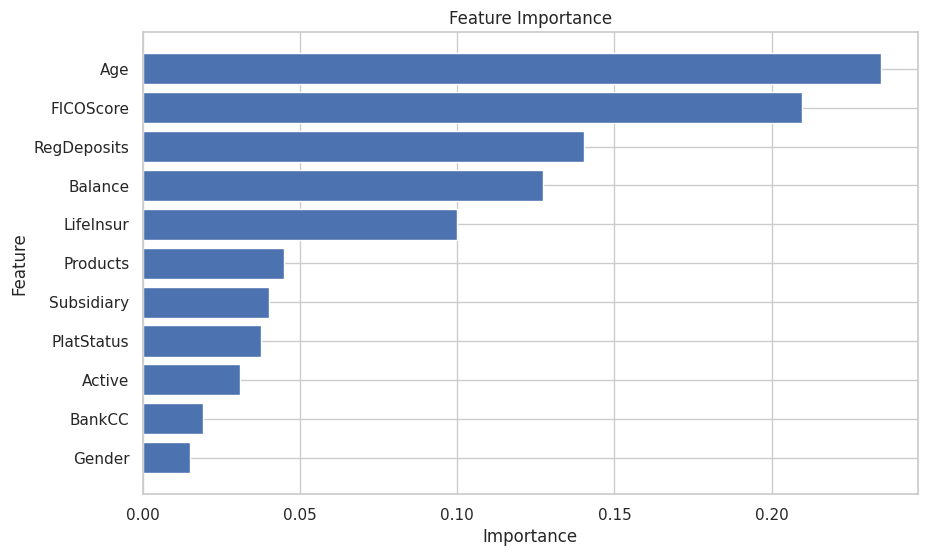

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")


Cross-Validation Accuracy: 0.90 ± 0.00


## 6.1 Evaluation Metrics and their Interpretation

The most common metric to evaluate a classifer is "accuracy".
- How well does your model do?
- Is accuracy a sufficiently good metric to evaluate your model? Are there other metrics? Which?
- What do different evaluation metrics capture? How do they matter differently for your business problem?

> ***Consider about the following***: What is the cost to the bank when the classifier makes a mistake? What mistakes can it even make (false positives vs. false negatives) and how might the implications of these differ?


## 6.2 Improving the Model

Explore how you could improve your model. Things you might ask the AI to help you with are:
1. Is there a better model for this task than the one I am using?
2. What are the optimal model parameters (i.e., "hyperparameters")?
3. Will this model generalize well?
4. Can we create additional meaningful variables from the data (i.e., "feature engineering")
5. Did we really get all information from the data? Is there any hidden information in a variable that we may have discarded such as "customer ID"?

# 7. Use Model on New Customers Quantify its Value to Bank

Ok, we've built a model. Let's use our model to decide on who to fight for and who to let go (i.e., churn).

> Why not fight for everyone?

Ok, here are the steps:
1. Use our model to predict churn for new customers that have not yet churned (we have no outcome yet!)
2. Determine who to let go and who to fight for
  -->  ***Need a metric for customer value!***

## 7.1 Load New Customer Data

The bank gave us a set of new customers (those that we have no outcome for):
- "Bank_Churn_NewCustomers.json"

Load the data and inspect it:
- Cannot drop customers (i.e., remove rows) - ***Why?***
- No response variable - ***Why?***

> **Bank Revenue** is new! ***What to do with it?***
  - Can we use it for precition?
  - Can we use it as a metric for customer value?

In [ ]:
# prompt: load Bank_Churn_NewCustomers.json from 488/class03 folder on my google drive

import pandas as pd
import os

# Assuming you've already mounted Google Drive in a previous cell
# from google.colab import drive
# drive.mount('/content/drive')

# Change to the correct directory
os.chdir("/content/drive/My Drive/488/Class03")  # Note: class03 instead of Class03

# Load the new customer data
try:
    new_customers_df = pd.read_json('Bank_Churn_NewCustomers.json')
    print("New customer data loaded successfully.")
    display(new_customers_df.head()) # Display first few rows for inspection
except FileNotFoundError:
    print("Error: 'Bank_Churn_NewCustomers.json' not found in the specified directory.")
except Exception as e:
    print(f"An error occurred: {e}")

New customer data loaded successfully.


,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,BnkRev
0,40ATL20090WS41659688130478N,Wadhams,Sanford,694,Atlanta,Male,44,108144.68,1,1,0,17817,0,0,2697
1,40ATL20170FP60312547517267P,Fettig,Pennie,598,Atlanta,Female,34,96288.36,2,1,1,13426,1,1,2228
2,91CHL20170GT18583156644435N,Gaede,Todd,795,Chapel Hill,Male,50,93941.60,1,1,0,14721,0,0,2320
3,61BOS20190KR46667217568988N,Kruppa,Roberto,545,Boston,Male,28,115471.93,1,1,0,9879,0,0,2606
4,40ATL20170GE64239156077829P,Girad,Eddie,575,Atlanta,Male,41,109667.80,2,1,0,13189,1,1,2389


In [ ]:
# Step 1: Exclude non-predictive columns like 'Bank Revenue' if it exists
if 'Bank Revenue' in new_customers_df.columns:
    new_customers_df = new_customers_df.drop(columns=['Bank Revenue'])

# Step 2: Fix categorical columns
# Categorical columns identified earlier
categorical_columns = ['Gender', 'Subsidiary', 'BankCC', 'Active', 'LifeInsur', 'PlatStatus']

# Fix typos or inconsistent values in the categorical columns
new_customers_df['Gender'] = new_customers_df['Gender'].replace('Feale', 'Female')
new_customers_df['BankCC'] = new_customers_df['BankCC'].replace(2, 1)
new_customers_df['Active'] = new_customers_df['Active'].replace(2, 1)
new_customers_df['PlatStatus'] = new_customers_df['PlatStatus'].replace('yes', '1')

# Convert categorical columns to type 'category'
for col in categorical_columns:
    if col in new_customers_df.columns:
        new_customers_df[col] = new_customers_df[col].astype('category')

# Step 3: Fix numerical columns
valid_ranges = {
    'FICOScore': (300, 850),  # Valid range for FICO scores
    'Age': (18, 100),         # Valid age range
    'Balance': (-float('inf'), float('inf')),  # Allow negative balances
    'Products': (1, 5),       # Plausible range of products
    'RegDeposits': (0, 100000)  # Regular deposits should be >= 0
}

def fix_numerical_variable(data, column, valid_range):
    lower, upper = valid_range
    # Replace invalid or missing values with the median of valid values
    median = data[column][(data[column] >= lower) & (data[column] <= upper)].median()
    # Cast the median to the same type as the column
    if pd.api.types.is_integer_dtype(data[column]):
        median = int(median)
    elif pd.api.types.is_float_dtype(data[column]):
        median = float(median)

    # Replace invalid or missing values
    data.loc[(data[column] < lower) | (data[column] > upper) | (data[column].isnull()), column] = median

    # Calculate bounds for outlier removal
    mean = data[column].mean()
    std_dev = data[column].std()
    upper_limit = mean + 3 * std_dev
    lower_limit = mean - 3 * std_dev

    # Remove outliers
    return data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

# Clean numerical variables
for col, range_ in valid_ranges.items():
    if col in new_customers_df.columns:
        new_customers_df = fix_numerical_variable(new_customers_df, col, range_)

# Step 4: Encode categorical features
for col in categorical_columns:
    if col in new_customers_df.columns:
        le = LabelEncoder()
        new_customers_df[col] = le.fit_transform(new_customers_df[col])

# Step 5: Display the cleaned dataset
print("New customer data preprocessed successfully.")
display(new_customers_df.head())

New customer data preprocessed successfully.


,ClientID,Surname,Firstname,FICOScore,Subsidiary,Gender,Age,Balance,Products,BankCC,Active,RegDeposits,LifeInsur,PlatStatus,BnkRev
0,40ATL20090WS41659688130478N,Wadhams,Sanford,694,0,1,44,108144.68,1,1,0,17817,0,0,2697
1,40ATL20170FP60312547517267P,Fettig,Pennie,598,0,0,34,96288.36,2,1,1,13426,1,1,2228
2,91CHL20170GT18583156644435N,Gaede,Todd,795,2,1,50,93941.60,1,1,0,14721,0,0,2320
3,61BOS20190KR46667217568988N,Kruppa,Roberto,545,1,1,28,115471.93,1,1,0,9879,0,0,2606
4,40ATL20170GE64239156077829P,Girad,Eddie,575,0,1,41,109667.80,2,1,0,13189,1,1,2389


## 7.3 Predict Customer Churn with your Model
You need to use your trained model to predict, for each customer of the new dataset, whether they will churn or not.

In [ ]:
# Predict churn for the new customer dataset
new_customer_predictions = clf.predict(new_customers_df)

# Create a DataFrame with predictions
new_customers_df['Churn_Prediction'] = new_customer_predictions

# Display the predictions
print("Predictions for New Customers:")
display(new_customers_df[['Churn_Prediction']].head())

# Save predictions to a file for further use
new_customers_df.to_csv('NewCustomers_Churn_Predictions.csv', index=False)
print("Predictions saved to 'NewCustomers_Churn_Predictions.csv'.")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BnkRev
- ClientID
- Firstname
- Surname


## 7.4 Who to Fight For?

- You want to fight for those at risk of churning, conditional on making money on them (bank revenue)
> Create a new dataframe that contains the customers your want to fight for.

- Can you quantify the financial risk (revenue at risk) associated with each of these customers?
  - Right now, you have a binary outcome (churn: yes/no). Can you get a continuous outcome like a churn probability? How?
> Calculate ***revenue at risk*** for all customers (even those that are not predicted to churn). Why?

$$\text{Revenue at Risk} = \text{Probability to Churn} \times \text{Bank Revenue}$$

## 7.5 Tell a Story

How to convey to bank leadership:
1. How big the churn problem is?
2. How valuable your model is?

> Can you show distributions of Revenue at Risk?
> Quantify total revenue at risk?
> Tell a story about which customers are most important to retain? Which to let go?